In [5]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [6]:
f = r.TFile("./gm2offline_ana_18891487_16469.00151.root")
f.cd("farline")

True

In [34]:
t = f.Get("farline").Get("eventTree")
te = f.Get("farline").Get("eastTree")
te.SetLineColor(2)

tlw = f.Get("farline").Get("wveNoPartnerTree")
tlw.SetLineColor(8)

tle = f.Get("farline").Get("evwNoPartnerTree")
tle.SetLineColor(6)

In [17]:
condition = "time < 36/1.25*1000 && caloNum == 5 && energy > 250 && energy < 700 && time > 33*1000/1.25"
conditionEast = "time < 36/1.25*1000 && calorimeterIndex == 5 && energy > 250 && energy < 700 && time > 33*1000/1.25"
print(condition)

time < 36/1.25*1000 && caloNum == 5 && energy > 250 && energy < 700 && time > 33*1000/1.25


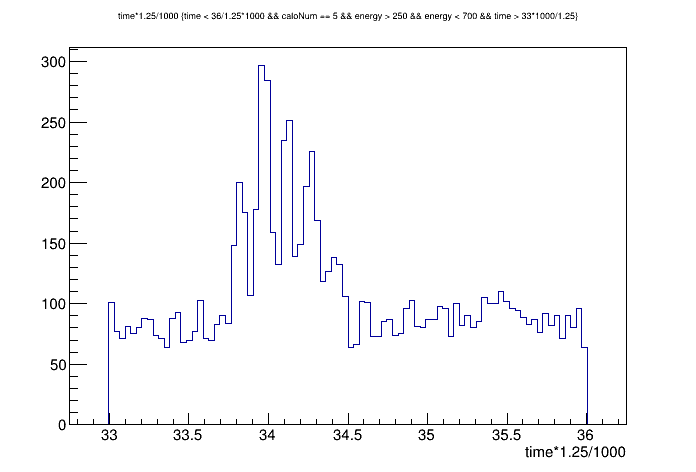

In [15]:
c = r.TCanvas()
t.Draw("time*1.25/1000",condition,"")
c.Draw()

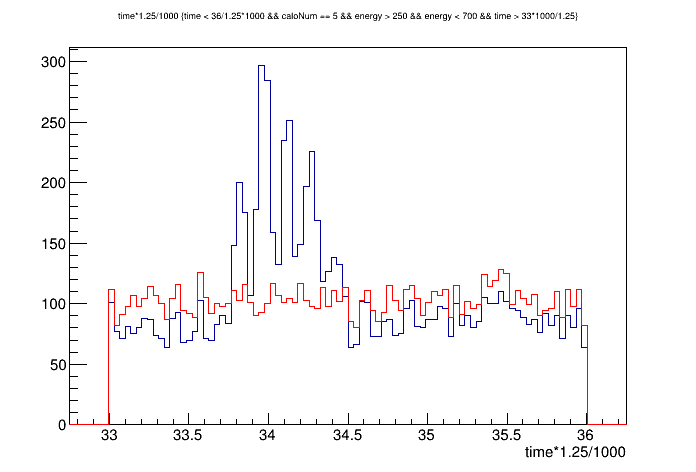

In [20]:
c = r.TCanvas()
t.Draw("time*1.25/1000",condition,"")
te.Draw("time*1.25/1000",conditionEast,"same")
c.Draw()

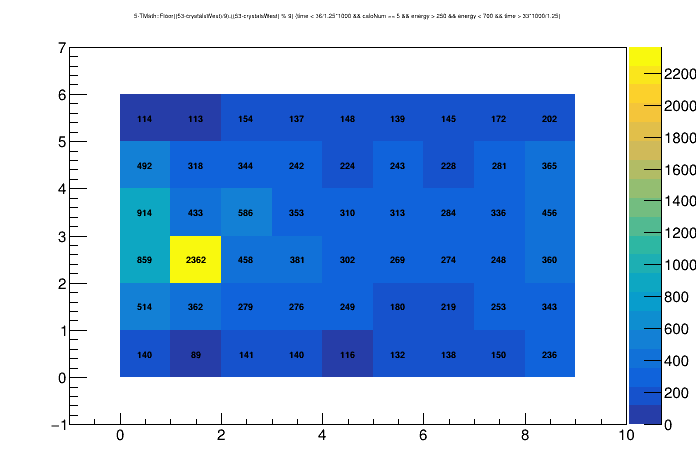

In [10]:
c = r.TCanvas()
t.Draw("5-TMath::Floor((53-crystalsWest)/9):((53-crystalsWest) % 9)>>hist(11,-1,10,8,-1,7)",
       condition,"colz text") 
c.Draw()

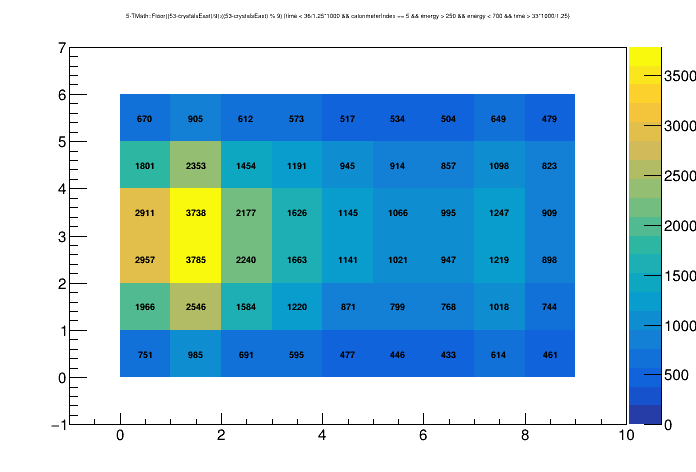

In [21]:
c = r.TCanvas()
te.Draw("5-TMath::Floor((53-crystalsEast)/9):((53-crystalsEast) % 9)>>hist(11,-1,10,8,-1,7)",
       conditionEast,"colz text") 
c.Draw()

---

### Lets look at the lonely west clusters for guidance

In [23]:
tlw.Print()

******************************************************************************
*Tree    :wveNoPartnerTree: wveNoPartnerTree                                       *
*Entries :   386310 : Total =       146463498 bytes  File  Size =   32820288 *
*        :          : Tree compression factor =   4.47                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   386310 : Total  Size=    1550379 bytes  File Size  =      13761 *
*Baskets :       46 : Basket Size=    3316736 bytes  Compression= 112.58     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   386310 : Total  Size=    1550529 bytes  File Size  =      13793 *
*Baskets :       46 : Basket Size=    3316736 bytes  Compression= 112.32     *
*.............................................

In [30]:
h = r.TH1D("h","Lonely Clusters", 2000,0,2000)
h2 = r.TH1D("h2","Lonely Clusters", 2000,0,2000)

h.SetFillColorAlpha(8,0.5)
h2.SetFillColorAlpha(9,0.5)

tlw.Draw("energyWest>>h","caloNum == 5","goff")
tlw.Draw("energyWest>>h2","caloNum != 5","goff")

357583

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


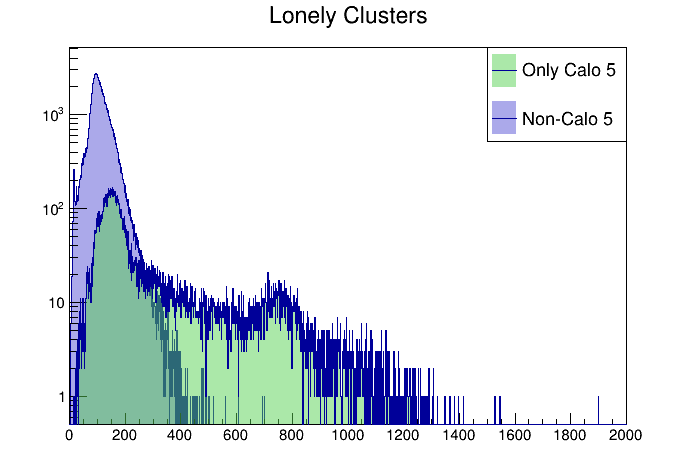

In [36]:
c = r.TCanvas()

h2.Draw()
h.Draw("SAME")

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(h,"Only Calo 5", "lf")
leg.AddEntry(h2,"Non-Calo 5", "lf")
leg.Draw()

c.SetLogy()
c.Draw()